In [33]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras import optimizers
# import pylab as pl
import matplotlib.cm as cm
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_shape = (150, 150, 3)
img_width = 150
img_height = 150

# nb_train_samples = 2000
# nb_validation_samples = 1000
batch_size = 16
epochs = 2

train_data_dir = 'pizza_not_pizza/train'
validation_data_dir = 'pizza_not_pizza/valid'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.3,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

Found 1968 images belonging to 2 classes.
Found 1968 images belonging to 2 classes.


In [61]:
# Creating out model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Activation('sigmoid'))
# model.add(Activation('softmax'))
print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 72, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

None


In [63]:
nb_train_samples = 1968
nb_validation_samples = 1968
epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    #callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 45s 359ms/step - accuracy: 0.5196 - loss: 0.7658 - val_accuracy: 0.6778 - val_loss: 0.6550
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 45s 357ms/step - accuracy: 0.6471 - loss: 0.6487 - val_accuracy: 0.6972 - val_loss: 0.5909
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 108us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 44s 355ms/step - accuracy: 0.6744 - loss: 0.6136 - val_accuracy: 0.6545 - val_loss: 0.6054
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 47s 379ms/step - accuracy: 0.7016 - loss: 0.5981 - val_accuracy: 0.7475 - val_loss: 0.5098
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 108us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 50s 398ms/step - accuracy: 0.7141 - loss: 0

2024-09-16 08:55:25.530343: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


123/123 ━━━━━━━━━━━━━━━━━━━━ 46s 369ms/step - accuracy: 0.7361 - loss: 0.5525 - val_accuracy: 0.7886 - val_loss: 0.4433
Epoch 14/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 93us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 52s 414ms/step - accuracy: 0.7203 - loss: 0.5576 - val_accuracy: 0.7622 - val_loss: 0.4769
Epoch 16/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 48s 386ms/step - accuracy: 0.7617 - loss: 0.5111 - val_accuracy: 0.8181 - val_loss: 0.4232
Epoch 18/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 19/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 49s 391ms/step - accuracy: 0.7513 - loss: 0.5147 - val_accuracy: 0.7475 - val_loss: 0.5231
Epoch 20/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 21/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 47s 379ms/step - accuracy: 0.7835 - loss: 0.4879

2024-09-16 09:08:22.626011: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


123/123 ━━━━━━━━━━━━━━━━━━━━ 60s 483ms/step - accuracy: 0.7887 - loss: 0.4599 - val_accuracy: 0.8491 - val_loss: 0.3675
Epoch 46/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 47/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 59s 479ms/step - accuracy: 0.8251 - loss: 0.4069 - val_accuracy: 0.8044 - val_loss: 0.4427
Epoch 48/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 49/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 59s 476ms/step - accuracy: 0.8246 - loss: 0.4205 - val_accuracy: 0.8430 - val_loss: 0.3681
Epoch 50/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 51/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 54s 435ms/step - accuracy: 0.8280 - loss: 0.4101 - val_accuracy: 0.8669 - val_loss: 0.3281
Epoch 52/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 121us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 53/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 45s 360ms/step - accuracy: 0.8175 - loss: 0.406

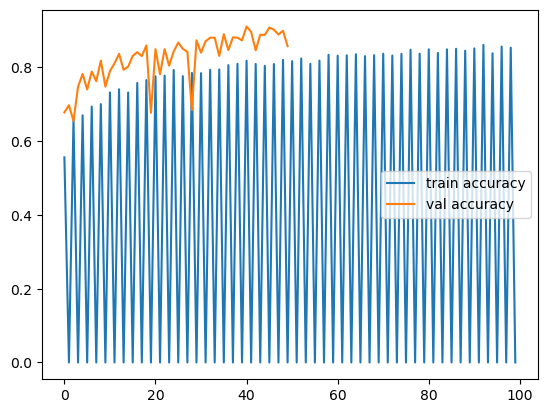

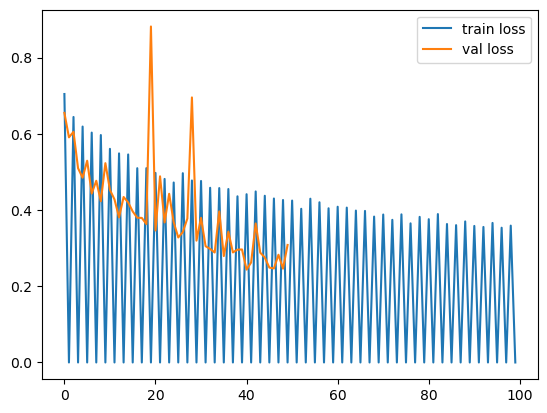

In [65]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [71]:
model.save('model_binary.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


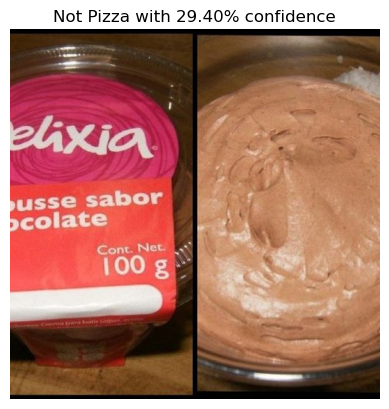

In [79]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('model_binary.h5')  # or 'model_cnn.keras'

# Path to your image file
img_path = 'pizza_not_pizza/train/not_pizza/1018802.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Use the target size from your model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input
img_array = img_array / 255.0  # Rescale the image

# Make a prediction
prediction = model.predict(img_array)

# Get the probability score (the model returns a value between 0 and 1)
accuracy = prediction[0][0]

# Determine if it's pizza or not
if accuracy > 0.5:
    label = "Pizza"
else:
    label = "Not Pizza"

# Show the image
plt.imshow(image.load_img(img_path))
plt.title(f"{label} with {accuracy * 100:.2f}% confidence")
plt.axis('off')  # Hide axis
plt.show()

